# TP 4 Regression logistique avec régularisation
Dans ce TP, nous aimerions faire une classification binaire en utilisant la régression.

Pour ce faire, nous étudierons un ensemble de données avec la variable  (y) representant la commercialisation d'un profuit et les caractéristiques (X) representant les résultat des tests de qualité test 1 et test 2 du produit.

La prédiction se fera avec l'agorithme de descente du gradient avec régularisation.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(118, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente la commercialisation (1 oui 0 non).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [4]:
print('X', X.shape ,' y ', y.shape)

X (118, 3)  y  (118, 1)


# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

In [5]:
def mapping(X):
    
    cols = 28
    degree=7
    outX= np.ones((X.shape[0],cols))
    X1=X[:,1]
    X2=X[:,2]
    k=0
    for i in range(degree):
        for j in range(i+1):
            outX[:, k] = np.power(X1,i-j)*(np.power(X2,j))
            k=k+1
    return outX    


In [6]:
X2=mapping(X)
X2.shape

(118, 28)

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [7]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z))
 

In [8]:
k=Sigmoid(-10)
k

4.5397868702434395e-05

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [9]:
def computeCost(X, y, theta):
    pred=np.dot(X,theta)
    y_pred=Sigmoid(pred)
    cost=-(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
    J= np.mean(cost)
    return J

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [10]:
#fonction pour le calcule de la derivé du cout 
def get_deriv(X, y, theta):
    pred=Sigmoid(np.dot(X,theta))-y
    A=np.transpose(X)
    deriv=np.dot(A,pred)
    return deriv/(X.shape[0])
# pour la descente du gradient de plus de la valeur optimiser de theta on retourne aussi des données pour les exploité dans 
# des graphes 
# une liste de touts les thetas calculé
#une liste des cout calculé pour chaque theta
def gradientDescent(X, y, theta, alpha, iterations,early_stopping=False):
    thetas=[]
    cost_history=[]
    epsilon = 1e-9
    for i in range(0,iterations):
        deriv=get_deriv(X, y, theta) 
        theta=theta - alpha*deriv        
        thetas.append(theta)
        cost_history.append(computeCost(X, y, theta))
        #on s'arrete si le changement du cout entre iteration est trés petit 
        if early_stopping and i > 0 and (cost_history[-2] - cost_history[-1]) < epsilon: 
            break
    return theta,thetas,cost_history
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [11]:
n=X2.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Calculer le cout initial

In [12]:
initialCost=computeCost(X2, y, theta)
print(initialCost)

0.6931471805599454


Appel des la fonction de calcul du gradient

In [13]:

# paramètres
iterations = 10000
alpha = 0.01
# Appel
theta,_,costs= gradientDescent(X2, y, theta, alpha, iterations)
print(theta)
Cost=computeCost(X2, y, theta)
print("le cout : ",Cost)

[[ 1.30842140e+00]
 [ 6.99970574e-01]
 [ 1.36301054e+00]
 [-2.16888688e+00]
 [-9.29100016e-01]
 [-1.31265012e+00]
 [ 1.01949605e-01]
 [-3.89042194e-01]
 [-3.75522697e-01]
 [-2.32114598e-01]
 [-1.66181248e+00]
 [-9.10521331e-02]
 [-6.54923843e-01]
 [-2.71367171e-01]
 [-1.33604317e+00]
 [-3.14177843e-01]
 [-2.38838440e-01]
 [-7.49163024e-02]
 [-2.96183805e-01]
 [-2.99555974e-01]
 [-6.59785611e-01]
 [-1.22505305e+00]
 [-1.75705685e-03]
 [-3.23388448e-01]
 [-1.49945165e-03]
 [-3.57051760e-01]
 [-1.37199610e-01]
 [-1.18284101e+00]]
le cout :  0.45119817343229607


Traçage de la fonction du coût

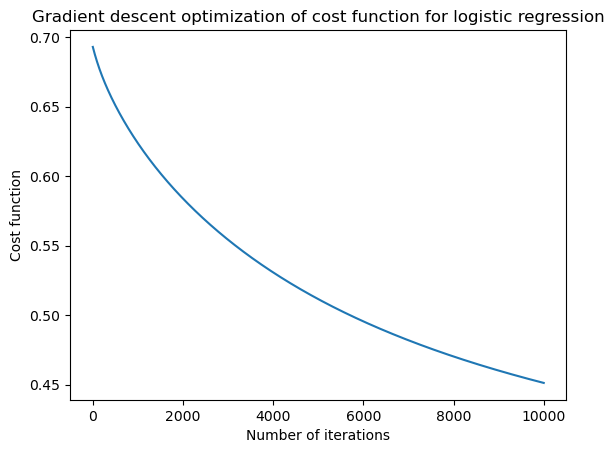

In [14]:
#graphe de l'evolution du cout par rapport aux nombre d'iteration
plt.plot(range(len(costs)), costs)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
plt.title("Gradient descent optimization of cost function for logistic regression")
plt.show()

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [15]:
def drawCircle(X,theta):
    # creer l'intervalles des données
    min1, max1 = X[:, 1].min()-0.15, X[:, 1].max()+0.15
    min2, max2 = X[:, 2].min()-0.15, X[:, 2].max()+0.15
    x1grid = np.arange(min1, max1, 0.01)
    x2grid = np.arange(min2, max2, 0.01)
    # creation de la grille
    xx, yy = np.meshgrid(x1grid, x2grid)
    # transformation de la grille en vecteur 
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # concatener les données pour avoir les deux  caractéristique x1,x2
    grid = np.hstack((r1,r2))
    intercept=np.ones((grid.shape[0],1))
    grid=np.column_stack((intercept,grid))
    grid=mapping(grid)
    #generation des prediction 
    yhat = predict( grid,theta )

    # transformer  les predictions en grille
    zz = yhat.reshape(xx.shape)
    # afficher la grille avec la limite de la decision 
    plt.contourf(xx, yy, zz, cmap='Paired')
    # creation des points de chaque classe 
    plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')
    plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
    plt.xlabel('x 1')
    plt.ylabel('x 2')
    plt.show()

# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [16]:
def predict( X,theta,th=0.5 ) : 
    Z = Sigmoid(np.dot(X,theta)) 
    Y = np.where( Z > th, 1, 0 )        
    return Y

# Affichage 
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'x 2')

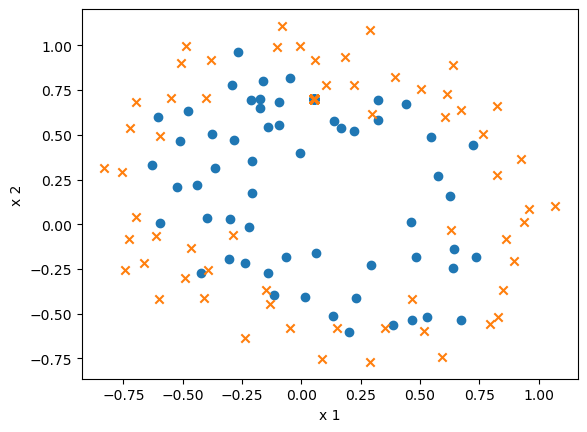

In [17]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')

plt.xlabel('x 1')
plt.ylabel('x 2')

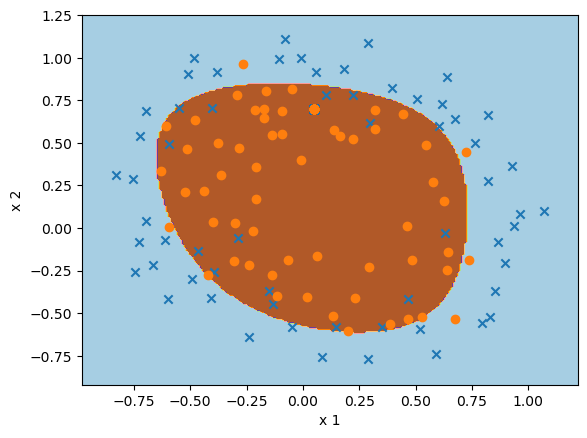

In [18]:
drawCircle(X,theta)

# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [19]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(X2,theta)
prcision = np.mean(y==y_pred)*100
print(prcision)

83.05084745762711


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

### Algorithme sklearn

In [20]:
from sklearn.preprocessing import PolynomialFeatures
clf = LogisticRegression()
y_true = y.reshape( y.shape[0],)
trans = PolynomialFeatures(degree=6)
X_sk=trans.fit_transform(X[:,1:])
clf.fit(X_sk, y_true)
print("les parametres")
print(clf.intercept_,clf.coef_)
y_pred=clf.predict_proba (X_sk)
bce = log_loss(y, y_pred)
print('Binary Cross-Entropy:', bce)
y_pred=clf.predict (X_sk)
precision=metrics.precision_score(y_true, y_pred,average='macro')
print("precision: ",precision)

les parametres
[1.27281727] [[-9.40316896e-05  6.25200403e-01  1.18110372e+00 -2.01998737e+00
  -9.17422545e-01 -1.43161951e+00  1.24007673e-01 -3.65545995e-01
  -3.57235803e-01 -1.75177398e-01 -1.45813451e+00 -5.09079430e-02
  -6.15531333e-01 -2.74684592e-01 -1.19285084e+00 -2.42159297e-01
  -2.06009268e-01 -4.46834189e-02 -2.77786348e-01 -2.95378201e-01
  -4.56358841e-01 -1.04313960e+00  2.78215032e-02 -2.92419721e-01
   1.56135368e-02 -3.27375607e-01 -1.43860298e-01 -9.24641743e-01]]
Binary Cross-Entropy: 0.4624605198159484
precision:  0.8397058823529412


**la limite de decision**

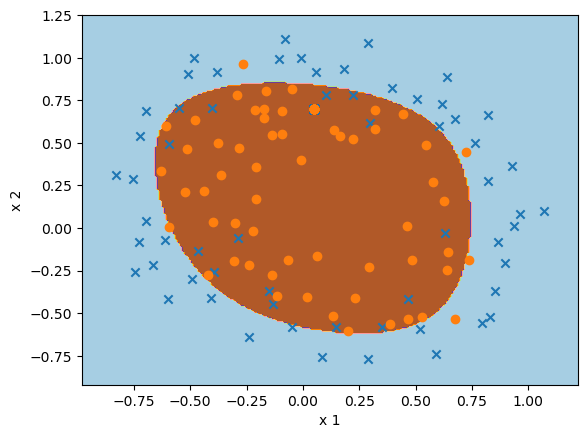

In [21]:
#on recupere les paramétres du modele sklearn
theta_sk = np.zeros(theta.shape)
theta_sk = clf.coef_.reshape(-1, 1)
theta_sk[0] = clf.intercept_[0]
drawCircle(X,theta_sk)

### Notre implementation 

In [22]:
n=X2.shape[1]
theta = np.zeros((n, 1))
# paramètres
iterations = 10000
alpha = 0.01
# Appel
theta,_,costs= gradientDescent(X2, y, theta, alpha, iterations)
print("les parametres")
print(theta)
Cost=computeCost(X2, y, theta)
print("le cout : ",Cost)
y_pred=predict(X2,theta)
prcision = np.mean(y==y_pred)*100
print("prcision:",precision)

les parametres
[[ 1.30842140e+00]
 [ 6.99970574e-01]
 [ 1.36301054e+00]
 [-2.16888688e+00]
 [-9.29100016e-01]
 [-1.31265012e+00]
 [ 1.01949605e-01]
 [-3.89042194e-01]
 [-3.75522697e-01]
 [-2.32114598e-01]
 [-1.66181248e+00]
 [-9.10521331e-02]
 [-6.54923843e-01]
 [-2.71367171e-01]
 [-1.33604317e+00]
 [-3.14177843e-01]
 [-2.38838440e-01]
 [-7.49163024e-02]
 [-2.96183805e-01]
 [-2.99555974e-01]
 [-6.59785611e-01]
 [-1.22505305e+00]
 [-1.75705685e-03]
 [-3.23388448e-01]
 [-1.49945165e-03]
 [-3.57051760e-01]
 [-1.37199610e-01]
 [-1.18284101e+00]]
le cout :  0.45119817343229607
prcision: 0.8397058823529412


**la limite de decision**

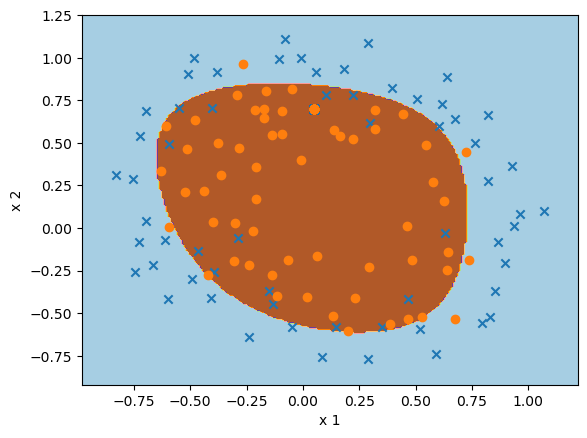

In [23]:
drawCircle(X,theta)

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

### implémentation de la regularization

In [24]:
#fonction de cout modifier pour prendre en conssideration la regularization
def computeCostReg(X, y, theta, lambdaa):
    pred=np.dot(X,theta)
    y_pred=Sigmoid(pred)
    eps = 1e-15
    y_Pred = np.clip((y_pred), eps, 1 - eps)
    cost=-(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
    J= np.mean(cost)-(lambdaa/ (2 * X.shape[0])*(theta[1:] ** 2).sum(axis=0))
    return J

In [25]:
#descent du gradient avec regularization ou lambda est le paramétre de regularization
def gradientDescentReg(X, y, theta, alpha, iterations,lambdaa,early_stopping=False):
    thetas=[]
    cost_history=[]
    epsilon = 1e-9
    for i in range(0,iterations):
        deriv=get_deriv(X, y, theta) 
        # theta zero n'est pas affecter par la regularization 
        theta[0] = theta[0] - alpha * deriv[0]
        #mettre a jour le reste des theta en prennant en consideration le terme de regularization.
        #en utilisant la formule du cours
        theta[1:] = theta[1:] * (1 - lambdaa * alpha / X.shape[0]) - alpha * deriv[1:]
        thetas.append(theta)
        cost_history.append(computeCostReg(X, y, theta,lambdaa))
        #on s'arrete si le changement du cout entre iteration est trés petit 
        if early_stopping and i > 0 and (cost_history[-2] - cost_history[-1]) < epsilon: 
            break
    return theta,thetas,cost_history
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1

(118, 3)
les parametres
[[ 1.01751236e+00]
 [ 4.43195884e-01]
 [ 9.52036236e-01]
 [-1.62491923e+00]
 [-6.21366553e-01]
 [-9.94547287e-01]
 [ 3.25486613e-02]
 [-2.67509056e-01]
 [-2.67171844e-01]
 [-1.91241027e-01]
 [-1.21974336e+00]
 [-5.88885147e-02]
 [-4.74324697e-01]
 [-1.75802478e-01]
 [-9.82886112e-01]
 [-2.46886003e-01]
 [-1.65203476e-01]
 [-5.96279358e-02]
 [-2.08232656e-01]
 [-2.04751951e-01]
 [-4.96074259e-01]
 [-8.91622482e-01]
 [ 2.93091879e-04]
 [-2.33670040e-01]
 [ 4.37328790e-05]
 [-2.56047034e-01]
 [-8.56889956e-02]
 [-8.67719051e-01]]
le cout :  0.49158502358337985
prcision: 0.8397058823529412


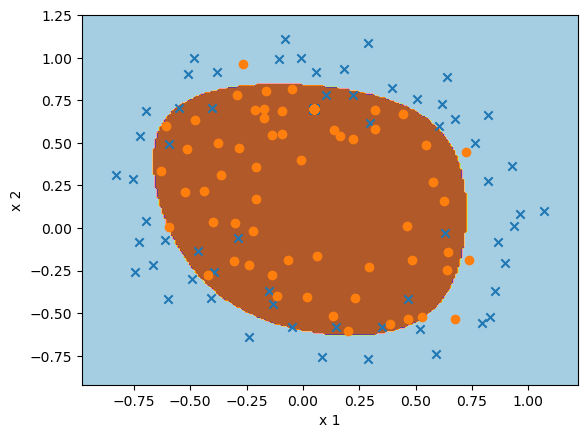

In [26]:

n=X2.shape[1]
theta = np.zeros((n, 1))
# paramètres
iterations = 10000
alpha = 0.01
print(X.shape)
# paramètre de regularization
lambdaa = 1

# Appel
theta,_,costs= gradientDescentReg(X2, y, theta, alpha, iterations,lambdaa)
print("les parametres")
print(theta)
Cost=computeCost(X2, y, theta)
print("le cout : ",Cost)
y_pred=predict(X2,theta)
prcision = np.mean(y==y_pred)*100
print("prcision:",precision)
drawCircle(X,theta)

* on remarque qu'avec regularization les résultas sont proche des  résultas sans regulrizaton mais afin de définir le meilleur paramétre de regularization il faut effectué plus de test 

### Optimisation du terme de regularization

* afin d'optimise ce terme on vas utilisé la bibliothéque sklearn pour utiliser la Grid search et la cross-validation en utilisant K-folds

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import precision_score


# on selection le model a optimiser dans notre cas logistic regression 
model = LogisticRegression(max_iter=1000)

# on difinie la grille de paramétre a rechercher 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# on definit les K-plie pour la cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# on definit C qui est le tere de regularistion pour les modéle sklearn comme hyper paramétre a optimise
#et on utilise la fonction de cout log_loss pour guidé la recherche 
grid_search = GridSearchCV(model, param_grid=param_grid, scoring='neg_log_loss', cv=kf)
# recherche par grille sur nos données 
grid_search.fit(X_sk, y_true)

# affichage des réultas 
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Cost Score: ", -grid_search.best_score_)


Best Hyperparameters:  {'C': 10}
Best Cost Score:  0.4279456611729834


* on remarque qu'avec C=10 on peux avoir un cout encore un peux plus petit que le model sklearn standard et avec un model qui est cette fois plus géneralisable

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 01 Avril 2022 à 22h


In [28]:
# bonne chance